<a href="https://colab.research.google.com/github/StanleyLiangYork/NLP_deepLearning/blob/master/text_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [ ]:
print(xs[6])
print(ys[6])

[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5664 - accuracy: 0.0177
Epoch 2/500
15/15 [==============================] - 0s 7ms/step - loss: 5.5354 - accuracy: 0.0530
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 5.4629 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.2864 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 7ms/step - loss: 5.1233 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0718 - accuracy: 0.0552
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 5.0355 - accuracy: 0.0574
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0056 - accuracy: 0.0530
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9815 - accuracy: 0.0552
Epoch 10/500
15/15 [==============================] - 0s 7ms/step - loss: 4.9494 - accuracy: 0.0508
Epoch 11/

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

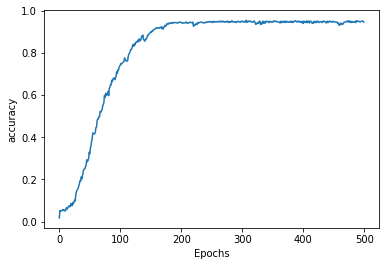

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])
	token_list = pad_sequences(token_list, maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin new of athy one jeremy lanigan lanigan mchugh mchugh mchugh suppose suppose suppose suppose think of give her a call and reel and a jig jig academy academy academy academy academy academy big peggy entangled a your eyes her together lanigans her her as glisten plenty as a rose rose rose cask cask a as rose and jig eyes and cakes again phelim mchugh a rose mchugh eyes entangled me a rose eyes and cakes again phelim mchugh mchugh from a mchugh hoops by a call call man again again again again dublin suppose mccarthy mccarthy mccarthy mccarthy mccarthy mccarthy


Predict irish poem

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-07-09 22:33:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.13.128, 74.125.133.128, 74.125.140.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-07-09 22:33:35 (68.6 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [ ]:
print(xs[7])
print(ys[7])
print(xs[8])
print(ys[8])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  2 11]
[0. 0. 0. ... 0. 0. 0.]
[ 0  0  0  0  0  0  0  0  0  0  0  0  2 11 15]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 120, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(180)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.008)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)


Epoch 1/100
377/377 [==============================] - 4s 11ms/step - loss: 6.7120 - accuracy: 0.0713
Epoch 2/100
377/377 [==============================] - 4s 11ms/step - loss: 5.8805 - accuracy: 0.0980
Epoch 3/100
377/377 [==============================] - 4s 11ms/step - loss: 5.1749 - accuracy: 0.1430
Epoch 4/100
377/377 [==============================] - 4s 11ms/step - loss: 4.3282 - accuracy: 0.1997
Epoch 5/100
377/377 [==============================] - 4s 11ms/step - loss: 3.4374 - accuracy: 0.2965
Epoch 6/100
377/377 [==============================] - 4s 11ms/step - loss: 2.6399 - accuracy: 0.4176
Epoch 7/100
377/377 [==============================] - 4s 11ms/step - loss: 2.0233 - accuracy: 0.5353
Epoch 8/100
377/377 [==============================] - 4s 11ms/step - loss: 1.5978 - accuracy: 0.6289
Epoch 9/100
377/377 [==============================] - 4s 11ms/step - loss: 1.2775 - accuracy: 0.7007
Epoch 10/100
377/377 [==============================] - 4s 11ms/step - loss: 1.057

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

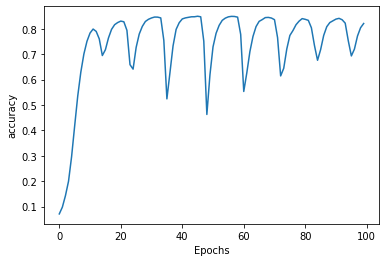

In [ ]:
plot_graphs(history, 'accuracy')

Character based RNN sequence generation

In [51]:
seed_text = "I've got a bad feeling about this"
next_words = 120
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])
	token_list = pad_sequences(token_list, maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

NameError: ignored

In [2]:
import os
import time

In [3]:
path_to_file = tf.keras.utils.get_file('/content/shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [4]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [5]:
# Take a look at the first 20 characters in text
print(text[:20])

First Citizen:
Befor


In [6]:
# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

65 unique characters


Vectorize the text -two lookup tables

*   mapping characters to numbers
*   mapping numbers to characters



In [7]:
# Creating a mapping from unique characters to indices
# dict for character to number index
char2idx = {u:i for i, u in enumerate(vocab)}
# numpy version of characters
idx2char = np.array(vocab)
# mapping each character to a number index
text_as_int = np.array([char2idx[c] for c in text])

In [8]:
print(text[:10])
print(text_as_int[:10]) # one character --> one number

First Citi
[18 47 56 57 58  1 15 47 58 47]


In [9]:
print('{')
for char,_ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [10]:
# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(text[:13], text_as_int[:13]))

First Citizen ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right.
e.g. Hell --> ello <p>
So we break the text into chunks of seq_length+1 (holds X --> Y) <P>
Use the tf.data.Dataset.from_tensor_slices function to convert the text vector into a stream of character indices

In [11]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
  print('{} ----> {}'.format(i, idx2char[i]))

18 ----> F
47 ----> i
56 ----> r
57 ----> s
58 ----> t


The batch method lets us easily convert these individual characters to sequences of the desired size.

In [12]:
print(text[:200])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you


In [13]:
# devide the whole char sequence into chunks with pre-set batch size
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
  print(repr(''.join(idx2char[item])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [14]:
# get the input sequence and the label sequence
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [15]:
# show the first two input sequence and target
for input_example, target_example in  dataset.take(2):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
Input data:  'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you '
Target data: 're all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'


Each index of these vectors are processed as one time step. For the input at time step 0, the model receives the index for "F" and trys to predict the index for "i" as the next character. At the next timestep, it does the same thing but the RNN considers the previous step context in addition to the current input character.

In [16]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print("Step {:4d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx])))

Step    0
  input: 39 ('a')
  expected output: 56 ('r')
Step    1
  input: 56 ('r')
  expected output: 43 ('e')
Step    2
  input: 43 ('e')
  expected output: 1 (' ')
Step    3
  input: 1 (' ')
  expected output: 39 ('a')
Step    4
  input: 39 ('a')
  expected output: 50 ('l')


Create training batches

In [17]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

Build the RNN model

In [18]:
# Length of the vocabulary in chars
vocab_size = len(vocab) # 65 unique chars

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [19]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

In [133]:
model = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (64, None, 256)           16640     
_________________________________________________________________
gru_6 (GRU)                  (64, None, 1024)          3938304   
_________________________________________________________________
dropout_3 (Dropout)          (64, None, 1024)          0         
_________________________________________________________________
dense_6 (Dense)              (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [145]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(f'input batch shape: {input_example_batch.shape}, vocab-char size: {len(vocab)}')
  print(example_batch_predictions.shape, "= ( batch_size, sequence_length, vocab_size)")

input batch shape: (64, 100), vocab-char size: 65
(64, 100, 65) = ( batch_size, sequence_length, vocab_size)


In [146]:
# get the predictioin of 1 data point, one batch has 64 points
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
print(f'the input seq:\n {np.array(input_example_batch[0])}')
print(f'the output predict:\n {example_batch_predictions[0]}, \n total predict: {len(example_batch_predictions[0])}, \n equal to the length of the input sequence')
# reduce to vector
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
print(f'the index with highest logit output: {(sampled_indices)}')
print("Input: \n",f'{"".join(idx2char[input_example_batch[0]])}')
print("\n")
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices])))

the input seq:
 [39 56 50 47 49 43  1 19 39 59 52 58  6  0 13 52 42  1 40 63  1 58 46 43
  1 61 53 56 58 46  1 39 52 42  1 46 53 52 53 59 56  1 53 44  1 46 47 51
 57 43 50 44  6  0 15 53 51 54 56 47 57 47 52 45  1 39 50 50  1 58 46 39
 58  1 51 39 63  1 40 43  1 57 61 53 56 52  1 53 56  1 57 39 47 42  6  0
 20 47 57  1]
the output predict:
 [[ -0.8390355    4.4737697    0.1918157  ...  -2.59655      2.5302503
   -6.382758  ]
 [ -0.74475193   4.7973785   -0.15161017 ...  -5.188004     0.2535339
   -8.701349  ]
 [  0.45190018   7.2506604    0.46644422 ...  -6.855944     7.792626
   -8.680688  ]
 ...
 [ -6.9010296   -4.448863    -4.3762355  ...   1.7298471   -6.9617457
    1.5433046 ]
 [  5.0925665   13.732006     0.2772495  ... -10.804308    -4.159179
   -9.538286  ]
 [ -5.206641    -2.7089977   -4.1203194  ...  -8.104589     1.920866
   -3.1109924 ]], 
 total predict: 100, 
 equal to the length of the input sequence
the index with highest logit output: [47 43  5 52 43  1 58 47 59 52 58 

In [111]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

In [147]:
print(f'Y(batch, sequence):{target_example_batch.shape}, Y-hat(batch, sequence, vocab):{example_batch_predictions.shape}')
example_batch_loss  = loss(target_example_batch, example_batch_predictions)
print("scalar_loss: ", example_batch_loss.numpy().mean())

Y(batch, sequence):(64, 100), Y-hat(batch, sequence, vocab):(64, 100, 65)
scalar_loss:  0.7694741


In [137]:
model.compile(optimizer='adam', loss=loss)

In [25]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [143]:
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 8s 44ms/step - loss: 1.0092
Epoch 2/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9921
Epoch 3/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9758
Epoch 4/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9637
Epoch 5/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9499
Epoch 6/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9409
Epoch 7/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9314
Epoch 8/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9244
Epoch 9/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9198
Epoch 10/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9123
Epoch 11/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9076
Epoch 12/20
172/172 [==============================] - 7s 43ms/step - loss: 0.9036
Epoch 13/20
1

In [116]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

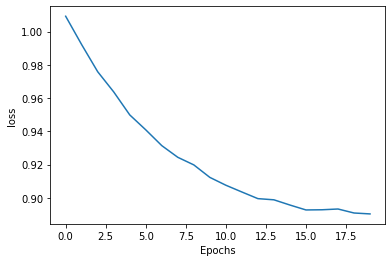

In [144]:
plot_graphs(history, 'loss')

In [148]:
model_predict = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model_predict.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model_predict.build(tf.TensorShape([1, None]))

In [204]:
num_generate = 2000
start_string = u"ROMEO: " # 7 chars
# char to sequence
input_eval = [char2idx[s] for s in start_string]
input_eval = tf.expand_dims(input_eval, 0)
print(input_eval.numpy())
text_gen = []
# higer temp more rush text, lower temp more predictable text
temp = 0.8
model_predict.reset_states()

for i in range(num_generate):
  predictions = model_predict(input_eval)
  predictions = tf.squeeze(predictions, 0)
  predictions = predictions / temp
  predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
  input_eval = tf.expand_dims([predicted_id], 0)
  text_gen.append(idx2char[predicted_id])

output_text = start_string+"".join(text_gen)
print(output_text)

[[30 27 25 17 27 10  1]]
ROMEO: I have a brother treeb
'Tis dead her throne in the best, and then one want there's
have consumed with consequence is the intent
That they do happe sweet with words.

SICINIUS:
Where is the proportion of your will?

KING RICHARD III:
Hear me.

ANTONIO:
What did you do
But need you only your grace we have spent near slow;
So die without-sin, for this world entrails
That rail'd whthus was the tribunes of the make.

LUCIO:
My father is derave;
If pats that my followers from the Tower now,--

SICINIUS:
Well, girl; what said I should remain it so.

BIANCA:
Is be pluck out, of mockery, or any things as to jettle.
If thou may part; ench shows if an assurance,
That is not Richard, how a husband!
I do attend your worship. For mine own part,
When I should die with a fall poor city, fairte, and they are so let it
bless us; which you have accountan'd the very pin
That was my fellow unhaly hall,
Thou shalt be sent anon,
And watchers louder than I would pray for your l

In [29]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
      predictions = model(input_eval)
      # remove the batch dimension
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      predictions = predictions / temperature
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predicted_id], 0)

      text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [30]:
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: who's of
they harl in his mistress, you have
Because the one that hand forlow to live.

PETRUCHIO:
A husband by silenck! let me not say.

Bease;
And, Garder, thou shalt but master truth in the marsiness.
When caps the royal sucrue sister, so his nought Warwick discharged
Of your blood, they last love.

PAULINA:
Be instrument thy lips mage
He'll seem the cation?.

HORTENSIO:
In some fools your son liege, uncle's realm, think'st
To wail'd this gare ofrul hands, and cheerfully make you as you a word 'Werm too: they must King Richard, in joy
The gods along imprisonment crown Bornign.

KING EDWARD IV:
Well, besides, good Came by his father; call'd no harm and him:
And all the strength return to be our
presence, and Camillo thou comest thou, this little horse than I so 'greed.

Shooth,
But you stay at once, whilst sorrow came,
And the fathers mounted arrey too dukedom.
Let him be, in cursed hate
But your woes should piece en our hateful liege
In sig infurrent were elsewhere
As they ar

Customize the training loss

In [20]:
model_custom = build_model(
  vocab_size = len(vocab),
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

Build the optimized loss function

In [22]:
@tf.function
def train_step(inp, target):
  with tf.GradientTape() as tape:
    predictions = model_custom(inp)
    loss = tf.reduce_mean(
        tf.keras.losses.sparse_categorical_crossentropy(
            target, predictions, from_logits=True))
  grads = tape.gradient(loss, model_custom.trainable_variables) # get the gradients
  # pipeline the gradients to the optimizer
  optimizer.apply_gradients(zip(grads, model_custom.trainable_variables))

  return loss

In [26]:
import time

# Training step
EPOCHS = 20
record = []
for epoch in range(EPOCHS):
  start = time.time()

  # initializing the hidden state at the start of every epoch
  # initally hidden is None
  hidden = model_custom.reset_states()

  for (batch_n, (inp, target)) in enumerate(dataset):
    loss = train_step(inp, target)

    if batch_n % 100 == 0:
      template = 'Epoch {} Batch {} Loss {}'
      print(template.format(epoch+1, batch_n, loss))

  # saving (checkpoint) the model every 5 epochs
  if (epoch + 1) % 5 == 0:
    model_custom.save_weights(checkpoint_prefix.format(epoch=epoch))

  print ('Epoch {} Loss {:.4f}'.format(epoch+1, loss))
  print ('Time taken for 1 epoch {:.2f} sec\n'.format(time.time() - start))
  record.append(loss)

model_custom.save_weights(checkpoint_prefix.format(epoch=epoch))
history = {'loss':record}

Epoch 1 Batch 0 Loss 2.4267826080322266
Epoch 1 Batch 100 Loss 2.225112199783325
Epoch 1 Loss 2.1967
Time taken for 1 epoch 8.64 sec

Epoch 2 Batch 0 Loss 2.372197151184082
Epoch 2 Batch 100 Loss 2.1599318981170654
Epoch 2 Loss 2.2151
Time taken for 1 epoch 8.27 sec

Epoch 3 Batch 0 Loss 2.3310418128967285
Epoch 3 Batch 100 Loss 2.2164053916931152
Epoch 3 Loss 2.1766
Time taken for 1 epoch 8.44 sec

Epoch 4 Batch 0 Loss 2.2884175777435303
Epoch 4 Batch 100 Loss 2.1578876972198486
Epoch 4 Loss 2.1619
Time taken for 1 epoch 8.49 sec

Epoch 5 Batch 0 Loss 2.306990623474121
Epoch 5 Batch 100 Loss 2.1954758167266846
Epoch 5 Loss 2.1380
Time taken for 1 epoch 8.31 sec

Epoch 6 Batch 0 Loss 2.276719570159912
Epoch 6 Batch 100 Loss 2.149425745010376
Epoch 6 Loss 2.1122
Time taken for 1 epoch 8.20 sec

Epoch 7 Batch 0 Loss 2.336693525314331
Epoch 7 Batch 100 Loss 2.117783784866333
Epoch 7 Loss 2.0686
Time taken for 1 epoch 8.35 sec

Epoch 8 Batch 0 Loss 2.2708041667938232
Epoch 8 Batch 100 Loss

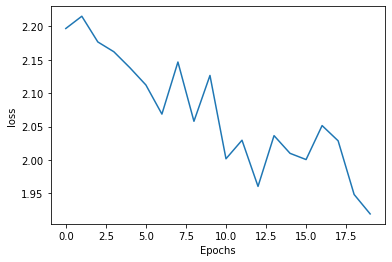

In [27]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show()

In [28]:
model_predict = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
model_predict.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_predict.build(tf.TensorShape([1, None]))

num_generate = 1000
start_string = u"ROMEO: " # 7 chars
# char to sequence
input_eval = [char2idx[s] for s in start_string]
input_eval = tf.expand_dims(input_eval, 0)
print(input_eval.numpy())
text_gen = []
# higer temp more rush text, lower temp more predictable text
temp = 1.0
model_predict.reset_states()

for i in range(num_generate):
  predictions = model_predict(input_eval)
  predictions = tf.squeeze(predictions, 0)
  predictions = predictions / temp
  predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
  input_eval = tf.expand_dims([predicted_id], 0)
  text_gen.append(idx2char[predicted_id])

output_text = start_string+"".join(text_gen)
print(output_text)

[[30 27 25 17 27 10  1]]
ROMEO: Thelay petime.
Hourd noy tow''l triveir.

QUEENTES:
If se ol midrere, owimbemono song it of hary home tren
To breawermy of 'tly king the worco. Worinsseed my of a blermolr your,--as arloy ie blowarst. Briot me trewinco me dou haty efforgoospize
Te troursere good you to thy quee ingen. Totely, we lovowis thie yol ast orio.
Then, ard the stely some my splothen, our arly ight in.
Whe hold the dightillst popeait: Butisell? in thour then heyor's! Totturbar sople to s you ore nour greak or's
WhIN Blore ther'de, telf to her herfulperomsot for your not
Tiilletave corsteritiir, wordil;
In Ein ollee it mo.

KILLO:
Cilistirnttry arse, my Mormitime, aury tley thoun sstelie,
Their tremy moul dosern in witerft to Edwith prome Porvoysinisune
To poom saro it wat
To howheris thy for mistar mores me tels,
Brefment, time, bedse, to treys.
O fe llfoles. Wireane thou was, a with ny homeror is Bor stroup isturess.

Proot or hom onail you; one.
He mado, womy le, ander'd ream s

Shakespeare problem

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [30]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /content/sonnets.txt
data = open('/content/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-07-10 23:34:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/content/sonnets.txt’

/content/sonnets.tx 100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-10 23:34:52 (61.5 MB/s) - ‘/content/sonnets.txt’ saved [93578/93578]



In [36]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(256, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 512)           731136    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dense_4 (Dense)              (None, 1605)              207045    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5156866   
Total params: 6,744,339
Trainable params: 6,744,339
Non-trainable params: 0
____________________________________________

In [37]:
history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
484/484 [==============================] - 7s 14ms/step - loss: 6.9279 - accuracy: 0.0209
Epoch 2/200
484/484 [==============================] - 6s 13ms/step - loss: 6.5030 - accuracy: 0.0211
Epoch 3/200
484/484 [==============================] - 6s 13ms/step - loss: 6.4005 - accuracy: 0.0251
Epoch 4/200
484/484 [==============================] - 7s 14ms/step - loss: 6.2925 - accuracy: 0.0290
Epoch 5/200
484/484 [==============================] - 7s 14ms/step - loss: 6.2229 - accuracy: 0.0333
Epoch 6/200
484/484 [==============================] - 6s 13ms/step - loss: 6.1589 - accuracy: 0.0368
Epoch 7/200
484/484 [==============================] - 7s 14ms/step - loss: 6.0950 - accuracy: 0.0367
Epoch 8/200
484/484 [==============================] - 7s 14ms/step - loss: 6.0328 - accuracy: 0.0408
Epoch 9/200
484/484 [==============================] - 6s 13ms/step - loss: 5.9644 - accuracy: 0.0438
Epoch 10/200
484/484 [==============================] - 7s 13ms/step - loss: 5.891

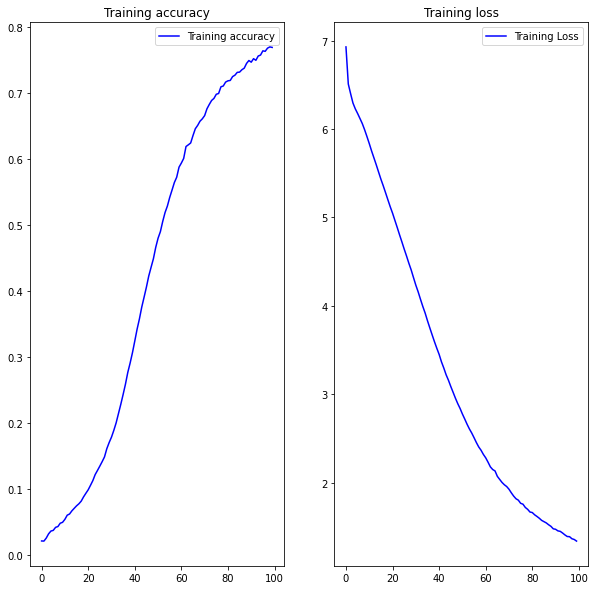

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [39]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])
	token_list = pad_sequences(token_list, maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and take things gone free boast woe our thing i tell me thence day bright are store all store still told to decay seen wrinkles your true delight fight shall bear your parts age well did quickly steep pride ' to thee still not do me express'd thine bear thine despising thine own state still still eye most true delight told to wrong and bold compare told that vanish'd or bright still express'd express'd forgot survey see things store to please them you know their store i sing the day nor wrong of masonry dear delight now forgot did betray
